# Learn how to use vision capabilities to understand images.

In [1]:
@file:DependsOn("com.openai:openai-java:4.8.0")

In [2]:
import com.openai.client.okhttp.OpenAIOkHttpClient

val client = OpenAIOkHttpClient.fromEnv()

In [3]:
import java.io.File
import kotlin.io.encoding.Base64
import kotlin.io.encoding.ExperimentalEncodingApi

// Encode Image to base64
@OptIn(ExperimentalEncodingApi::class)
fun encodeImage(imagePath: String) =
    "data:image/jpeg;base64,${Base64.encode(File(imagePath).readBytes())}"


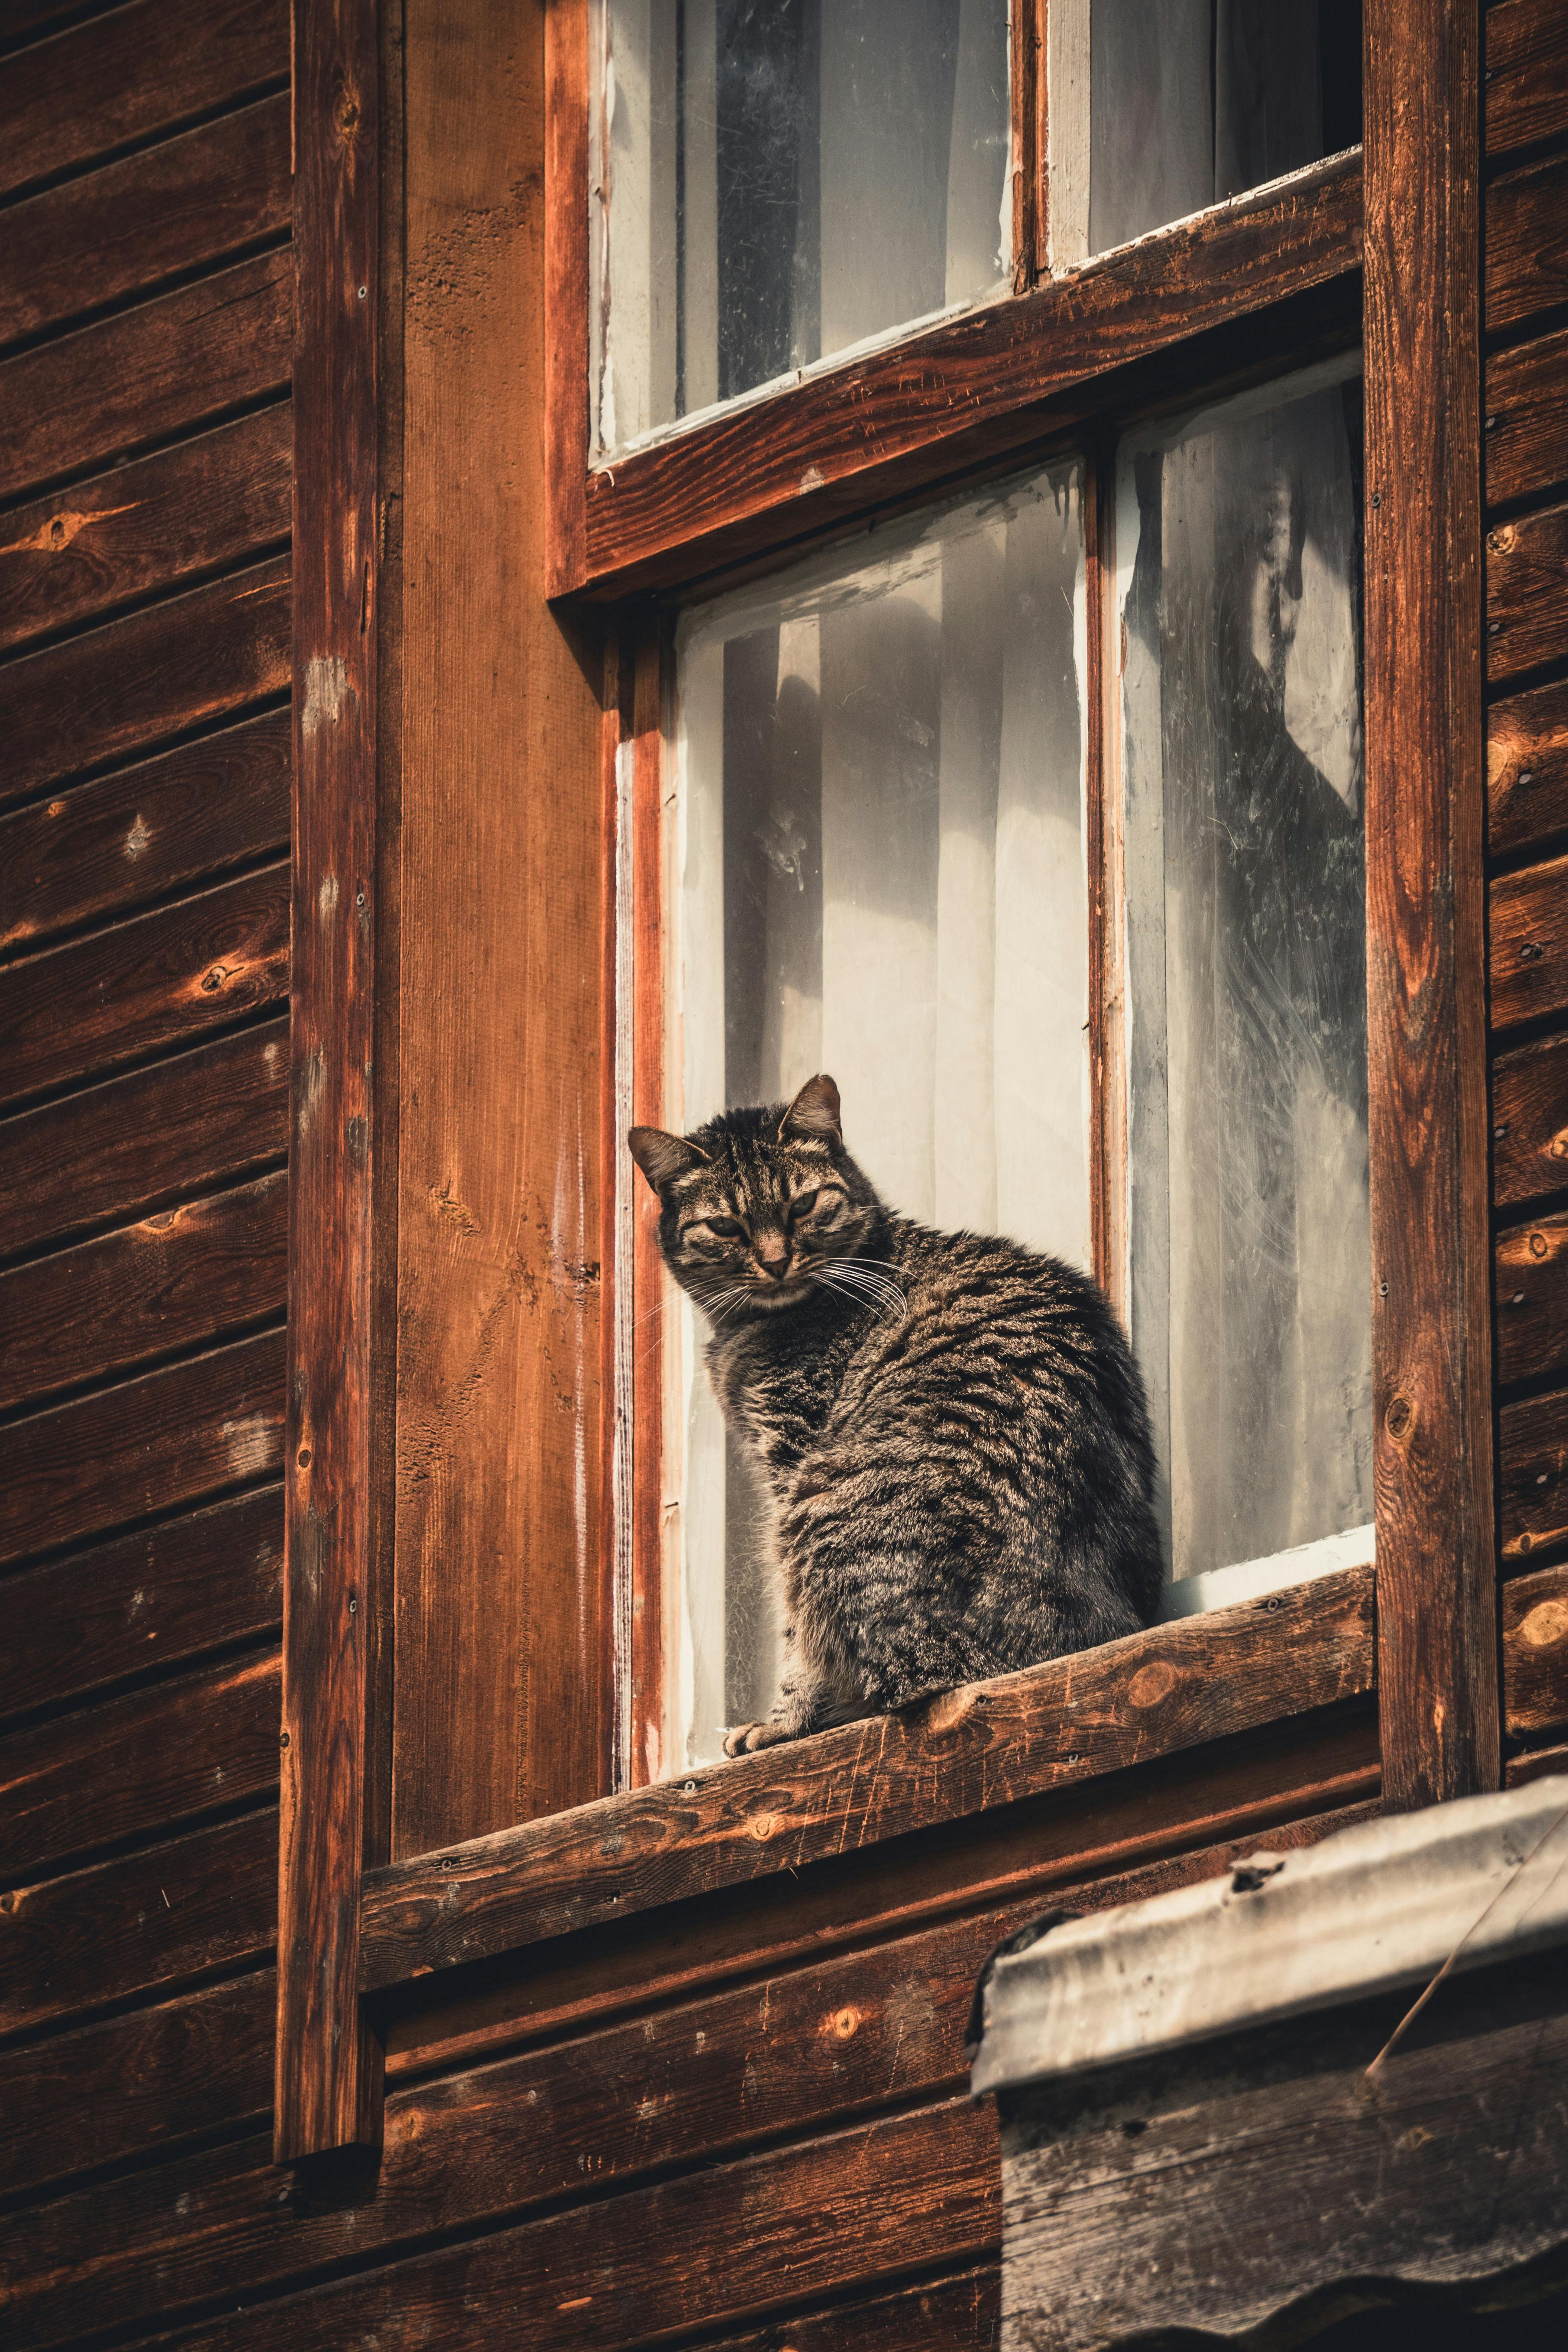

In [4]:
val imagePath = "data/cat.jpg"
val base64Image = encodeImage(imagePath)
HTML("<img src='$base64Image' width=450 height=650 />")

# Initialize model

In [5]:
import com.openai.models.ChatModel
import com.openai.models.chat.completions.ChatCompletionContentPart
import com.openai.models.chat.completions.ChatCompletionContentPartImage
import com.openai.models.chat.completions.ChatCompletionContentPartText
import com.openai.models.chat.completions.ChatCompletionCreateParams

val textPart = ChatCompletionContentPart.ofText(
    ChatCompletionContentPartText.builder()
        .text("what's in this image?")
        .build()
)
val imagePart = ChatCompletionContentPart.ofImageUrl(
    ChatCompletionContentPartImage.builder()
        .imageUrl(
            ChatCompletionContentPartImage.ImageUrl.builder()
                .url(base64Image)
                .build()
        )
        .build()
)

val params = ChatCompletionCreateParams.builder()
    .model(ChatModel.GPT_4O)
    .maxCompletionTokens(2048)
    .addUserMessageOfArrayOfContentParts(listOf(textPart, imagePart))
    .build()

In [6]:
val response = client.chat().completions().create(params)

In [7]:
import kotlin.jvm.optionals.getOrNull

response.choices().firstOrNull()?.message()?.content()?.getOrNull()

The image shows a tabby cat sitting on the windowsill of a wooden building. The cat is looking out from the window, and the wooden structure has a rustic appearance.